In [3]:
import warnings
import easyocr
import cv2
import matplotlib.pyplot as plt
import re
import torch
from PIL import Image
warnings.filterwarnings("ignore", category=FutureWarning)

ModuleNotFoundError: No module named 'easyocr'

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


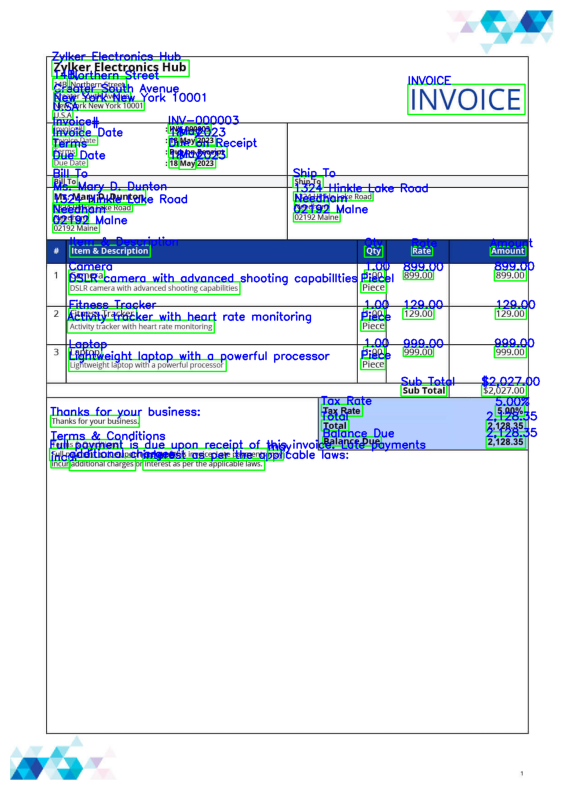

Detected Text: Zylker Electronics Hub (Confidence: 0.86)
Detected Text: Northern Street (Confidence: 0.71)
Detected Text: Greater South Avenue (Confidence: 0.91)
Detected Text: INVOICE (Confidence: 1.00)
Detected Text: New York New York 10001 (Confidence: 0.75)
Detected Text: U.SA (Confidence: 0.56)
Detected Text: Invoice# (Confidence: 0.78)
Detected Text: INV-000003 (Confidence: 0.99)
Detected Text: Invoice Date (Confidence: 0.87)
Detected Text: 18 (Confidence: 1.00)
Detected Text: 2023 (Confidence: 0.87)
Detected Text: Terms (Confidence: 1.00)
Detected Text: Due on Receipt (Confidence: 0.62)
Detected Text: Due Date (Confidence: 0.76)
Detected Text: 18 (Confidence: 0.98)
Detected Text: 2023 (Confidence: 1.00)
Detected Text: Bill To (Confidence: 0.99)
Detected Text: Ship To (Confidence: 0.84)
Detected Text: Ms. Mary D. Dunton (Confidence: 0.62)
Detected Text: 1324 Hinkle Lake Road (Confidence: 0.67)
Detected Text: 1324 Hinkle Lake Road (Confidence: 0.90)
Detected Text: Needham (Confide

In [3]:
#EXTRACTION OF ALL TEXT
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr.jpg'

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Display the image with bounding boxes for recognized text.
for (bbox, text, prob) in result:
    # Draw the bounding box around the detected text.
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Annotate the image with the detected text.
    image = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Use matplotlib to display the image.
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the extracted text results.
for detection in result:
    print(f"Detected Text: {detection[1]} (Confidence: {detection[2]:.2f})")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


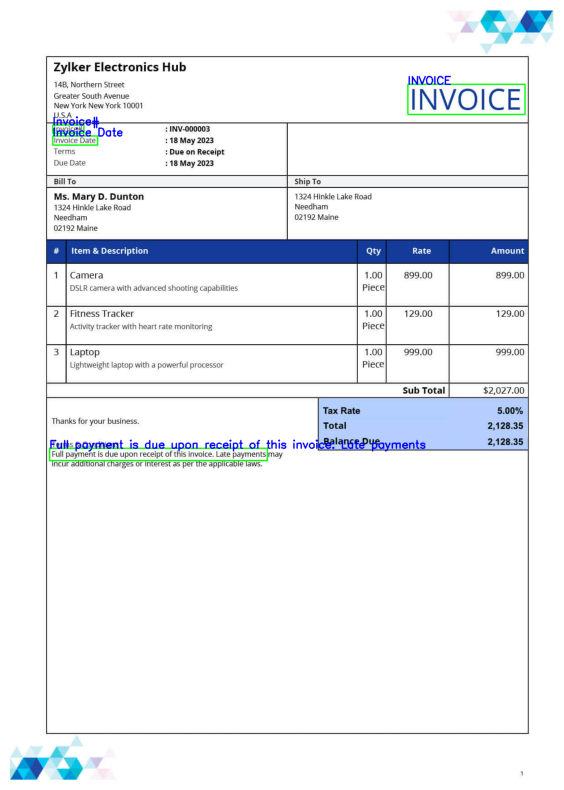

Extracted Invoice-related Text:
Detected Text: INVOICE (Confidence: 1.00)
Detected Text: Invoice# (Confidence: 0.78)
Detected Text: Invoice Date (Confidence: 0.87)
Detected Text: Full payment is due upon receipt of this invoice: Late payments (Confidence: 0.68)


In [6]:

reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr.jpg'

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Display the image with bounding boxes for invoice-related text.
for (bbox, text, prob) in result:
    if contains_invoice_keyword(text):
        # Draw the bounding box around the detected text related to invoice number.
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(x) for x in top_left])
        bottom_right = tuple([int(x) for x in bottom_right])
        image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        # Annotate the image with the detected text.
        image = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Use matplotlib to display the image.
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the extracted text results for invoice-related text only.
print("Extracted Invoice-related Text:")
for detection in result:
    text = detection[1]
    if contains_invoice_keyword(text):
        print(f"Detected Text: {text} (Confidence: {detection[2]:.2f})")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


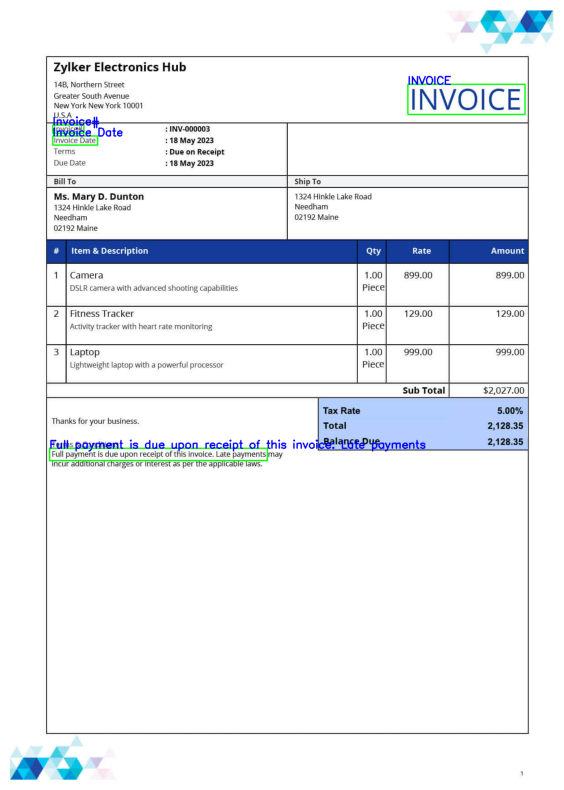

Extracted Invoice Numbers:
Not found
Not found
Not found
Not found


In [7]:
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr.jpg'

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to extract invoice number from the text following the label.
def extract_invoice_number(text):
    # This is a simple extraction approach; you may need to refine it based on your specific invoice format.
    match = re.search(r'\d+', text)
    return match.group(0) if match else "Not found"

# Initialize a list to hold the detected invoice numbers.
invoice_numbers = []

# Display the image with bounding boxes for invoice-related text.
for (bbox, text, prob) in result:
    if contains_invoice_keyword(text):
        # Draw the bounding box around the detected text related to invoice number.
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(x) for x in top_left])
        bottom_right = tuple([int(x) for x in bottom_right])
        image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        # Annotate the image with the detected text.
        image = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        # Extract the invoice number from the detected text.
        invoice_number = extract_invoice_number(text)
        invoice_numbers.append(invoice_number)

# Use matplotlib to display the image.
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the extracted invoice numbers.
print("Extracted Invoice Numbers:")
for number in invoice_numbers:
    print(number)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


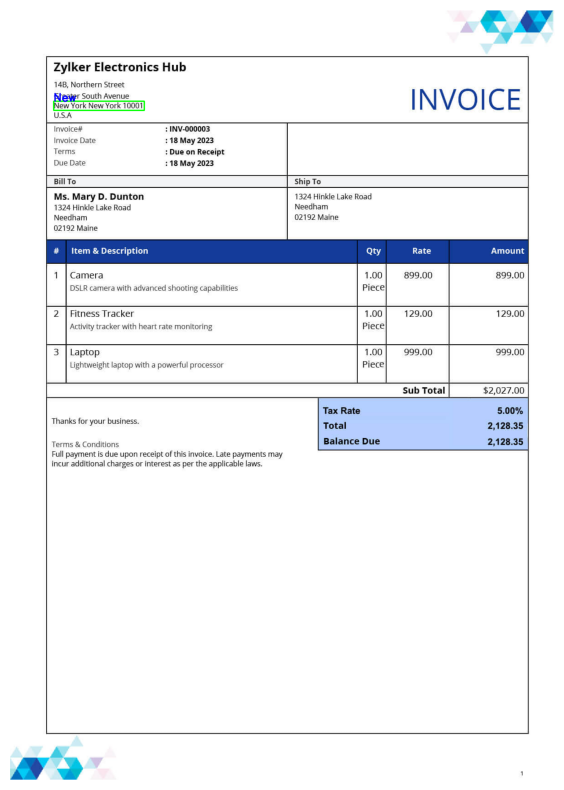

Extracted Invoice Number: New


In [8]:
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr.jpg'

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to extract the invoice number from the text after the keyword
def extract_invoice_number_from_text(text):
    # Match a string of digits or alphanumeric (for example, INV-12345 or 12345)
    match = re.search(r'(\d{5,}|\b[A-Za-z0-9\-]+\b)', text)
    if match:
        return match.group(0)  # Return the found invoice number
    return None

# Initialize variables to store invoice number bounding box.
invoice_number_bbox = None
invoice_number_text = None

# Loop through detected texts
for i, (bbox, text, prob) in enumerate(result):
    if contains_invoice_keyword(text):  # If we find an invoice-related keyword
        # Check if there's a next detection that could contain the invoice number
        if i + 1 < len(result):
            next_bbox, next_text, next_prob = result[i + 1]
            invoice_number = extract_invoice_number_from_text(next_text)
            if invoice_number:
                invoice_number_bbox = next_bbox  # Save the bounding box of the invoice number
                invoice_number_text = invoice_number  # Save the invoice number text
                break  # Exit loop after finding the first invoice number

# If an invoice number was found, draw the bounding box on the image.
if invoice_number_bbox:
    (top_left, top_right, bottom_right, bottom_left) = invoice_number_bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    # Draw bounding box around the invoice number
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    # Annotate the image with the detected invoice number.
    image = cv2.putText(image, invoice_number_text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print the extracted invoice number
    print(f"Extracted Invoice Number: {invoice_number_text}")
else:
    print("No invoice number found.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


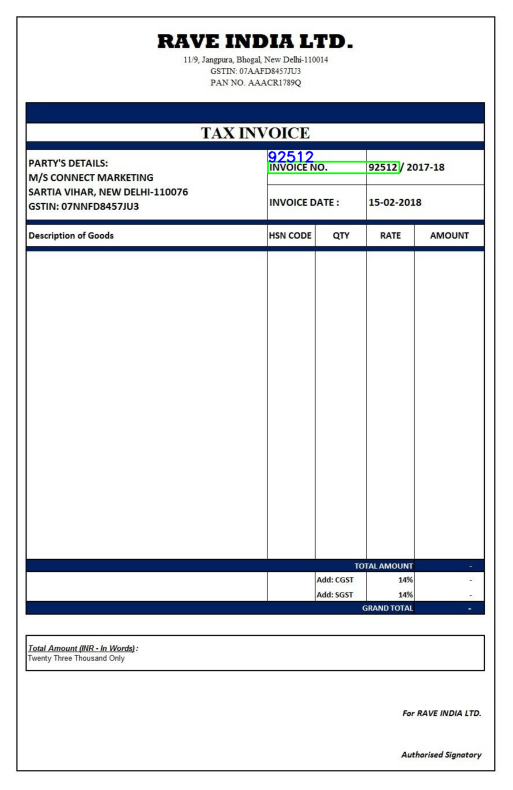

Extracted Invoice Number: 92512


In [9]:
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr3.jpg'

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to extract the invoice number based on proximity and context
def extract_invoice_number(result, keyword_index):
    """
    This function tries to extract the invoice number based on the proximity of the keyword 
    and matches only number-like text in the next result.
    """
    invoice_number = None
    invoice_number_bbox = None
    # Check the next item in the result list for the invoice number
    if keyword_index + 1 < len(result):
        next_text = result[keyword_index + 1][1]  # The text in the next detection
        next_bbox = result[keyword_index + 1][0]  # Bounding box of the next detection
        
        # Use regex to capture invoice numbers (e.g., 12345, INV-12345, or INV12345)
        match = re.search(r'\b([A-Za-z]*\d+)\b', next_text)
        if match:
            invoice_number = match.group(0)  # Return the matched invoice number
            invoice_number_bbox = next_bbox  # Get the bounding box of the invoice number
    
    return invoice_number, invoice_number_bbox

# Initialize variables to store invoice number bounding box.
invoice_number_bbox = None
invoice_number_text = None

# Loop through detected texts and search for invoice number keywords
for i, (bbox, text, prob) in enumerate(result):
    if contains_invoice_keyword(text):  # If we find an invoice-related keyword
        invoice_number_text, invoice_number_bbox = extract_invoice_number(result, i)
        if invoice_number_text:
            # Combine the keyword bounding box with the invoice number bounding box
            keyword_bbox = bbox
            combined_bbox = [
                [min(keyword_bbox[0][0], invoice_number_bbox[0][0]), min(keyword_bbox[0][1], invoice_number_bbox[0][1])],
                [max(keyword_bbox[1][0], invoice_number_bbox[1][0]), min(keyword_bbox[1][1], invoice_number_bbox[1][1])],
                [max(keyword_bbox[2][0], invoice_number_bbox[2][0]), max(keyword_bbox[2][1], invoice_number_bbox[2][1])],
                [min(keyword_bbox[3][0], invoice_number_bbox[3][0]), max(keyword_bbox[3][1], invoice_number_bbox[3][1])]
            ]
            break  # Exit loop after finding the first invoice number

# If an invoice number was found, draw the bounding box on the image.
if invoice_number_bbox:
    (top_left, top_right, bottom_right, bottom_left) = combined_bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    # Draw bounding box around the invoice number
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    # Annotate the image with the detected invoice number.
    image = cv2.putText(image, invoice_number_text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print the extracted invoice number
    print(f"Extracted Invoice Number: {invoice_number_text}")
else:
    print("No invoice number found.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


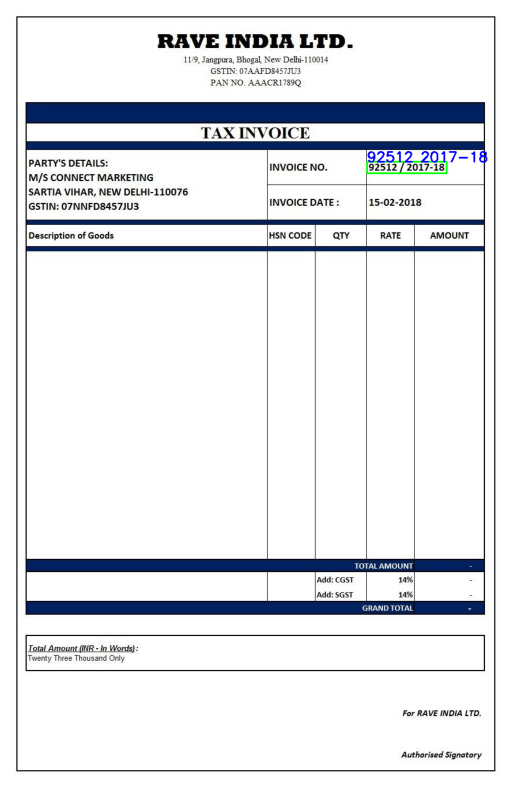

Extracted Invoice Number: 92512 2017-18


In [10]:
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr3.jpg'  # Update with the correct path to your image

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to merge bounding boxes
def merge_bboxes(bbox1, bbox2):
    # Merge two bounding boxes by taking the extreme points of both
    min_x = min(bbox1[0][0], bbox2[0][0])
    min_y = min(bbox1[0][1], bbox2[0][1])
    max_x = max(bbox1[2][0], bbox2[2][0])
    max_y = max(bbox1[2][1], bbox2[2][1])
    return [(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)]

# Function to extract the invoice number based on proximity and context
def extract_invoice_number(result, keyword_index):
    """
    This function tries to extract the invoice number based on the proximity of the keyword 
    and matches only number-like text in the next result. If the number is spread across 
    multiple detections, it will merge them.
    """
    invoice_number = None
    invoice_number_bbox = None
    invoice_full_text = ""
    
    # Check subsequent items in the result list for number-like text and merge bounding boxes
    for idx in range(keyword_index + 1, len(result)):
        next_text = result[idx][1]  # The text in the next detection
        next_bbox = result[idx][0]  # The bounding box of the next detection
        
        # Use regex to capture invoice numbers (e.g., 12345, INV-12345, or INV12345)
        if re.search(r'\b([A-Za-z]*\d+)\b', next_text):
            if invoice_number_bbox is None:
                invoice_number_bbox = next_bbox
            else:
                # Merge bounding boxes if we detect multiple parts of the number
                invoice_number_bbox = merge_bboxes(invoice_number_bbox, next_bbox)
            invoice_full_text += next_text + " "
        else:
            # Stop if the next part doesn't match a number
            break

    return invoice_full_text.strip(), invoice_number_bbox

# Initialize variables to store invoice number bounding box.
invoice_number_bbox = None
invoice_number_text = None

# Loop through detected texts and search for invoice number keywords
for i, (bbox, text, prob) in enumerate(result):
    if contains_invoice_keyword(text):  # If we find an invoice-related keyword
        invoice_number_text, invoice_number_bbox = extract_invoice_number(result, i)
        if invoice_number_text:
            break  # Exit loop after finding the first invoice number

# If an invoice number was found, draw the bounding box on the image.
if invoice_number_bbox:
    (top_left, top_right, bottom_right, bottom_left) = invoice_number_bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    # Draw bounding box around the invoice number
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    # Annotate the image with the detected invoice number.
    image = cv2.putText(image, invoice_number_text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print the extracted invoice number
    print(f"Extracted Invoice Number: {invoice_number_text}")
else:
    print("No invoice number found.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


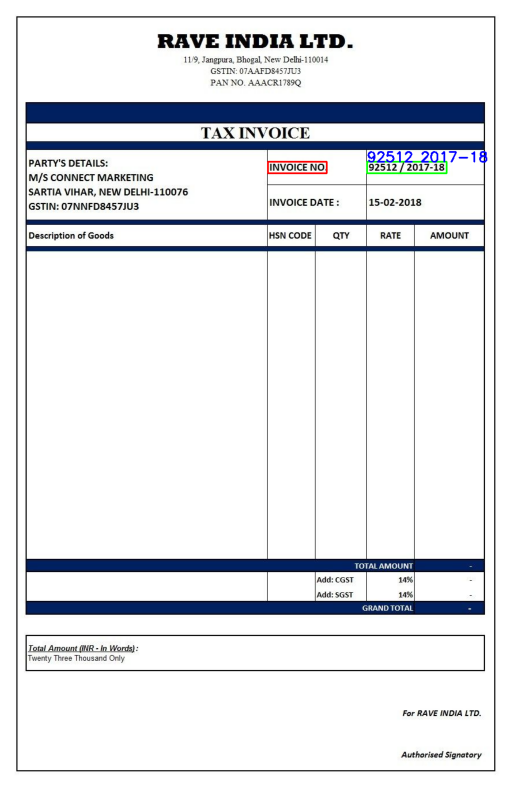

Extracted Invoice Number: 92512 2017-18


In [11]:

# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr3.jpg'  # Update with the correct path to your image

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number"
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", "invoice#", "invoice num", "inv#", "invoice"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to merge bounding boxes
def merge_bboxes(bbox1, bbox2):
    # Merge two bounding boxes by taking the extreme points of both
    min_x = min(bbox1[0][0], bbox2[0][0])
    min_y = min(bbox1[0][1], bbox2[0][1])
    max_x = max(bbox1[2][0], bbox2[2][0])
    max_y = max(bbox1[2][1], bbox2[2][1])
    return [(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)]

# Function to extract the invoice number based on proximity and context
def extract_invoice_number(result, keyword_index):
    """
    This function tries to extract the invoice number based on the proximity of the keyword 
    and matches only number-like text in the next result. If the number is spread across 
    multiple detections, it will merge them.
    """
    invoice_number = None
    invoice_number_bbox = None
    invoice_full_text = ""
    
    # Check subsequent items in the result list for number-like text and merge bounding boxes
    for idx in range(keyword_index + 1, len(result)):
        next_text = result[idx][1]  # The text in the next detection
        next_bbox = result[idx][0]  # The bounding box of the next detection
        
        # Use regex to capture invoice numbers (e.g., 12345, INV-12345, or INV12345)
        if re.search(r'\b([A-Za-z]*\d+)\b', next_text):
            if invoice_number_bbox is None:
                invoice_number_bbox = next_bbox
            else:
                # Merge bounding boxes if we detect multiple parts of the number
                invoice_number_bbox = merge_bboxes(invoice_number_bbox, next_bbox)
            invoice_full_text += next_text + " "
        else:
            # Stop if the next part doesn't match a number
            break

    return invoice_full_text.strip(), invoice_number_bbox

# Initialize variables to store invoice number and keyword bounding boxes.
invoice_number_bbox = None
invoice_number_text = None
keyword_bbox = None

# Loop through detected texts and search for invoice number keywords
for i, (bbox, text, prob) in enumerate(result):
    if contains_invoice_keyword(text):  # If we find an invoice-related keyword
        keyword_bbox = bbox  # Store the bounding box of the keyword
        invoice_number_text, invoice_number_bbox = extract_invoice_number(result, i)
        if invoice_number_text:
            break  # Exit loop after finding the first invoice number

# If the keyword was found, draw the bounding box on the image.
if keyword_bbox:
    (kw_top_left, kw_top_right, kw_bottom_right, kw_bottom_left) = keyword_bbox
    kw_top_left = tuple([int(x) for x in kw_top_left])
    kw_bottom_right = tuple([int(x) for x in kw_bottom_right])
    # Draw bounding box around the keyword
    image = cv2.rectangle(image, kw_top_left, kw_bottom_right, (0, 0, 255), 2)  # Red color for keyword

# If an invoice number was found, draw the bounding box on the image.
if invoice_number_bbox:
    (top_left, top_right, bottom_right, bottom_left) = invoice_number_bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    # Draw bounding box around the invoice number
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Green color for invoice number
    # Annotate the image with the detected invoice number.
    image = cv2.putText(image, invoice_number_text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the extracted invoice number
if invoice_number_text:
    print(f"Extracted Invoice Number: {invoice_number_text}")
else:
    print("No invoice number found.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


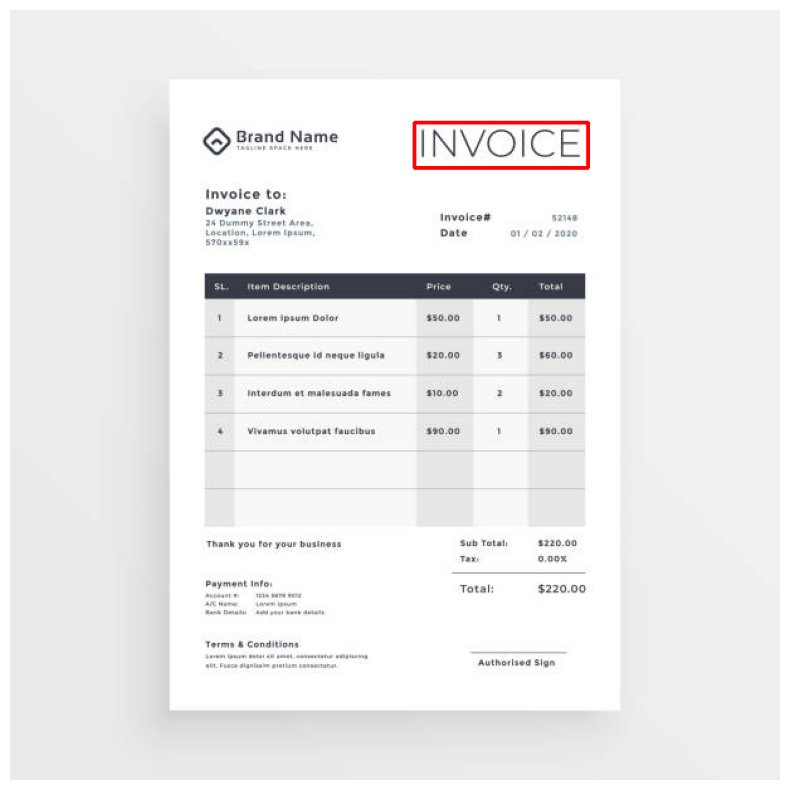

No invoice number found.


In [12]:
# Initialize the EasyOCR reader for English language.
reader = easyocr.Reader(['en'])

# Provide the path to the image from which you want to extract text.
image_path = 'testocr4.jpg'  # Update with the correct path to your image

# Read the image using OpenCV.
image = cv2.imread(image_path)

# Perform text extraction using EasyOCR.
result = reader.readtext(image_path)

# Define keywords/phrases related to "Invoice Number" with more variations.
invoice_keywords = [
    "invoice no", "invoice number", "inv no", "inv number", 
    "invoice#", "invoice num", "inv#", "invoice", "no.", "bill no", "ref no"
]

# Convert keywords to lowercase for case-insensitive matching.
invoice_keywords = [keyword.lower() for keyword in invoice_keywords]

# Function to check if extracted text contains any invoice-related keyword.
def contains_invoice_keyword(text):
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive comparison.
    for keyword in invoice_keywords:
        if re.search(rf'\b{keyword}\b', text_lower):  # Use regex to match whole words.
            return True
    return False

# Function to merge bounding boxes for dynamic bounding box expansion
def adjust_bboxes(bbox, buffer_left=10, buffer_bottom=5):
    # Get x and y coordinates for all 4 corners
    (top_left, top_right, bottom_right, bottom_left) = bbox
    
    # Adjust the bounding box to expand towards the left and bottom
    top_left = (top_left[0] - buffer_left, top_left[1])
    bottom_left = (bottom_left[0] - buffer_left, bottom_left[1] + buffer_bottom)
    top_right = (top_right[0], top_right[1])
    bottom_right = (bottom_right[0], bottom_right[1] + buffer_bottom)
    
    return [top_left, top_right, bottom_right, bottom_left]

# Function to extract the invoice number based on proximity and context
def extract_invoice_number(result, keyword_index):
    invoice_number = None
    invoice_number_bbox = None
    invoice_full_text = ""

    for idx in range(keyword_index + 1, len(result)):
        next_text = result[idx][1]  # The text in the next detection
        next_bbox = result[idx][0]  # The bounding box of the next detection
        
        # Use a more comprehensive regex to capture invoice numbers with letters, hyphens, etc.
        if re.search(r'\b([A-Za-z]*\d+[A-Za-z\-]*)\b', next_text):
            if invoice_number_bbox is None:
                invoice_number_bbox = next_bbox
            else:
                invoice_number_bbox = adjust_bboxes(next_bbox)  # Adjust bounding boxes
            invoice_full_text += next_text + " "
        else:
            break  # Stop if the next part doesn't match a number pattern

    return invoice_full_text.strip(), invoice_number_bbox

# Initialize variables to store invoice number and keyword bounding boxes.
invoice_number_bbox = None
invoice_number_text = None
keyword_bbox = None

# Loop through detected texts and search for invoice number keywords
for i, (bbox, text, prob) in enumerate(result):
    if contains_invoice_keyword(text):  # If we find an invoice-related keyword
        if prob > 0.5:  # Only consider detections with higher confidence
            keyword_bbox = bbox  # Store the bounding box of the keyword
            invoice_number_text, invoice_number_bbox = extract_invoice_number(result, i)
            if invoice_number_text:
                break  # Exit loop after finding the first invoice number

# If the keyword was found, draw the bounding box on the image.
if keyword_bbox:
    (kw_top_left, kw_top_right, kw_bottom_right, kw_bottom_left) = keyword_bbox
    kw_top_left = tuple([int(x) for x in kw_top_left])
    kw_bottom_right = tuple([int(x) for x in kw_bottom_right])
    image = cv2.rectangle(image, kw_top_left, kw_bottom_right, (0, 0, 255), 2)  # Red color for keyword

# If an invoice number was found, draw the bounding box on the image.
if invoice_number_bbox:
    # Adjust the bounding box around the invoice number
    invoice_number_bbox = adjust_bboxes(invoice_number_bbox, buffer_left=15, buffer_bottom=10)
    
    (top_left, top_right, bottom_right, bottom_left) = invoice_number_bbox
    top_left = tuple([int(x) for x in top_left])
    bottom_right = tuple([int(x) for x in bottom_right])
    
    # Draw bounding box around the invoice number
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Green color for invoice number
    
    # Annotate the image with the detected invoice number.
    image = cv2.putText(image, invoice_number_text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the extracted invoice number
if invoice_number_text:
    print(f"Extracted Invoice Number: {invoice_number_text}")
else:
    print("No invoice number found.")
